# NLP - Classification

Acum că știm cum să extragem valori numerice din texte o să trecem prin procesul de clasificare asupra unor date text. O să trecem prin partea de EDA la datele cu care o să lucrăm pentru început

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

În acest exemplu o să lucrăm cu un set de date ce reprezintă anumite tweets care au fost parcuse de către anumite persone și le-au oferit un label de tipul neutra, positive sau negative

In [3]:
df = pd.read_csv('../data/DATA/airline_tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## EDA

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

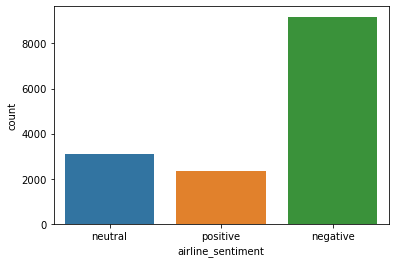

In [5]:
sns.countplot(data=df, x='airline_sentiment')

Coloana de 'airline_sentiment' reprezintă label-ul pentru acest set de date. Din acest set de date cea mai mare importanță o are categoria de negatives, deoarece acestea oferă cea mai mare informație către compania aeriană. Din acest motiv o să relizăm o clasificare binară prin care o să încercă să punem tweet-urile pozitive și neutre într-o categorie, iar cele negative în altă categorie.

Ce mai putem să vizualizăm ca să ne facem o idee despre tweet-urile negative este coloana care specifică motivul pentru care s-a hotărât că un anumit tweeet este negativ. Coloana respecivă poartă denumirea de 'negativereason'

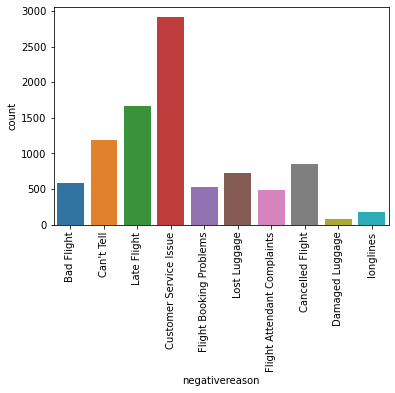

In [8]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

După cum se poate observa cele mai multe dintre review-urile negative au apărut din cauza unor probleme de Customer Service.

<AxesSubplot:xlabel='airline', ylabel='count'>

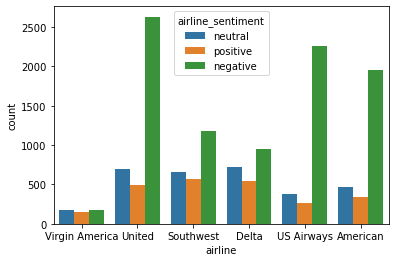

In [10]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

Prin graficul de mai sus putem să vedem ce review-uri au fiecare firmă aeriană în parte și să ne facem o idee cam care dintre companiile aeriene au avut cele mai multe review-uri negative.

În continnuare putem să începem să separăm Features de labels pentru acest set de date. De menționat faptul că o să lucrăm doar cu coloanele 'text' și 'airline_sentiment'.

In [11]:
X = df['text']
y = df['airline_sentiment']

În continuare trebuie să realizăm partea de train test split pentru acest set de date, iar abia după să utilizăm conceptele de Feature Extraction from text, motivul fiind să nu facem ceea ce poartă denumirea de Feature Leakeage

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

După ce am împărțit datele respective urmează partea de Feature Extraction from Text utilizând conceptele ce le-am învățat în partea anterioară, și anume utilizându-ne de TfidfVectorizer din Scikit-Learn. Ceea ce este util pentru acest set de date este faptul că toate aceste tweet-uri reprezintă review-uri despre zboruri ale anumitor companii aeriene. Acest lucru ne avantajează deoarece anumite cuvinte o să apară în aproape toate documentele, ceea ce înseamnă că o să aibă o importanță mai mică pentru partea de clasificare. Spre exemplu, cuvântul 'zbor' poate să apară aproape în toate documentele, dar nu specifică neapărat dacă e un tweet pozitiv sau negativ, deoarece poate fi 'zbor plăcut' sau 'zbor teribil'. Ambele expresii au cuvântul zbor, dar au valori total diferite, iar aceste cuvinte nu o să aibă o importanță foarte mare în partea de clasificare.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words='english')

După cum spuneam, pentru a nu apărea procesul de Data Leakeage trebuie să facem fit prima dată doar la datele de antrenare și abia după să le transformăm și pe cele de antrenare și pe cele de testare. Este un procedeu asemănător cu cel de scalare a datelor (StandardScaler())

In [17]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [18]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [19]:
X_train

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

Rezultatul acestor operații a dus la crearea anumitor matrice de tip sparse matrix, după cum am văzut în partea precedentă. Diferența dintre acestea este faptul că acum lucrând cu un număr mult mai mare de date, aceste matrice sunt extrem de mari (matricea de test are 11.712 coloane și 12.971 de rânduri). Din cauza aceasta, aceste matrici nu trebuie să le transformăm în matrici dense deoarece am putea primi o eroare de memorie.

Pasul următor este de a crea anumite modele de Machine Learning și de a le compara. Cel mai recomandat pentru acest tip de clasificare este algoritmul de Naive Bayes, dar putem utiliza și alte modele pentru a le compara la final. O să creem modele de Naive Bayes, Logistic Regression și Suport vector Machines pentru a le testa. Aceste modele o să le rulăm doar cu hyperparametrii default, iar la final o să facem o comparație între aceștia

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [25]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC()
lsvc_model.fit(X_train, y_train)

LinearSVC()

După ce am creat aceste modele urmează partea în care să le comparăm între ele. Pentru asta o să creem o funcție pentru a automatiza partea acesta pentru fiecare model, astfel să nu fim nevoiți să scriem cod duplicat.

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [27]:
def report(model):
    y_preds = model.predict(X_test)
    print(classification_report(y_test, y_preds))
    plot_confusion_matrix(model, X_test, y_test)

Cu funcția de mai sus putem să avem un raport detaliat al performanței modelului.

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


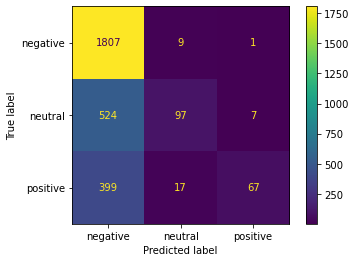

In [28]:
report(nb_model)

Modelul de Naive Bayes performează bine în ceea ce privește tweet-urile negative, dar are o performanță rea la celelalte valori. Putem vedea că omite doar 10 din totaul de negative, dar în această categorie de negative adaugă și peste 500 de tweet-uri care sunt neutre sau 400 care sunt pozitive, ceea ce nu este tocmai bun.

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


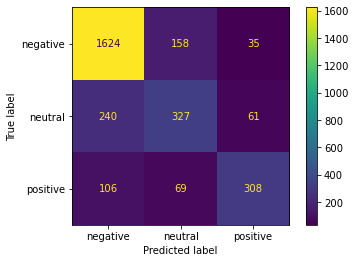

In [29]:
report(lsvc_model)

Cele mai bune valori sunt obținute de către modelul de LinearSVC(). Pentru a ajunge la o performanță și mai bună avem posibilitatea de a creau un Grid Search pentru a obține cele mai bune valori pentru hyperparametrii modelului.

Modelele de DecisionTree (și tot ce țin de acestea) nu prea se portivesc în aceste modele deoarece avem un număr prea mare de features peste care să se uite, iar atunci când creează acele Nodes are de ales din prea multe valori și se creează Decision Trees mult prea mari, din această cauză nu este indicat să îi folosim.

## Recapitulare

În cadrul acestei lecții am învățat:

    1. Procesul de TfidfVectorizer funcționează precum cel de StandardScaler(), și anume trebuie să facem fit prima dată la datele de antrenare pentru a nu avea Data Leakeage

        from sklear.feature_extraction.text import TfidfVectorizer

        tfidf = TfidfVectorizer(stop_word='english')

        tfidf.fit(X_train)

        X_train = tfidf.transform(X_train)

        X_test = tfidf.transform(X_test)

    2. Pentru un model de NLP nu este recomandat să se utilizeze Decision Tree (sau tot ce țin de aceste modele) deoarece având un număr extrem de mare de features este foarte greu să se creeze Decison Trees optimi